In [84]:
from IPython.display import Markdown, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import metrics
import math

In [85]:
from fairmlhealth import model_comparison as fhmc, reports
from fairmlhealth.mimic_data import load_mimic3_example

from fairmlhealth.utils import validate_notebook_requirements
validate_notebook_requirements()

In [86]:
path = "/Users/admin/Desktop/diabetes.csv"

In [87]:
dataset = pd.read_csv("diabetes.csv")

In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [91]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [58]:
dataset.loc[dataset['Age'] <= 40, 'Age_coded'] = 0
dataset.loc[dataset['Age'] > 40, 'Age_coded'] = 1
dataset = dataset.drop(['Age'], axis=1)

In [59]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Age_coded
0,6,148,72,35,0,33.6,0.627,1,1.0
1,1,85,66,29,0,26.6,0.351,0,0.0
2,8,183,64,0,0,23.3,0.672,1,0.0
3,1,89,66,23,94,28.1,0.167,0,0.0
4,0,137,40,35,168,43.1,2.288,1,0.0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,0,1.0
764,2,122,70,27,0,36.8,0.340,0,0.0
765,5,121,72,23,112,26.2,0.245,0,0.0
766,1,126,60,0,0,30.1,0.349,1,1.0


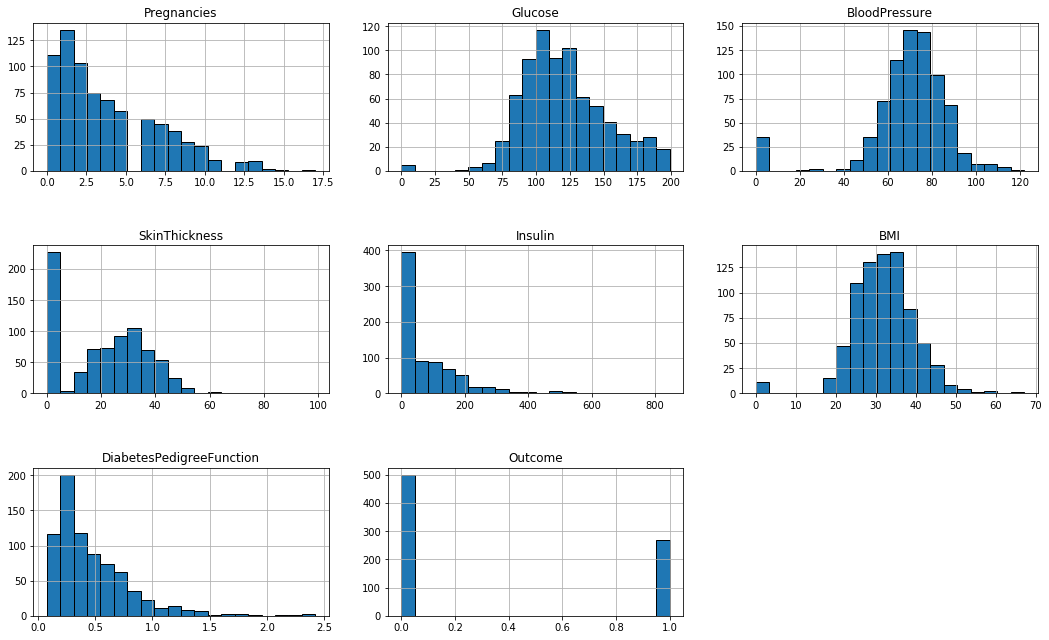

In [60]:
#Analysis of Data
columns=dataset.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dataset[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

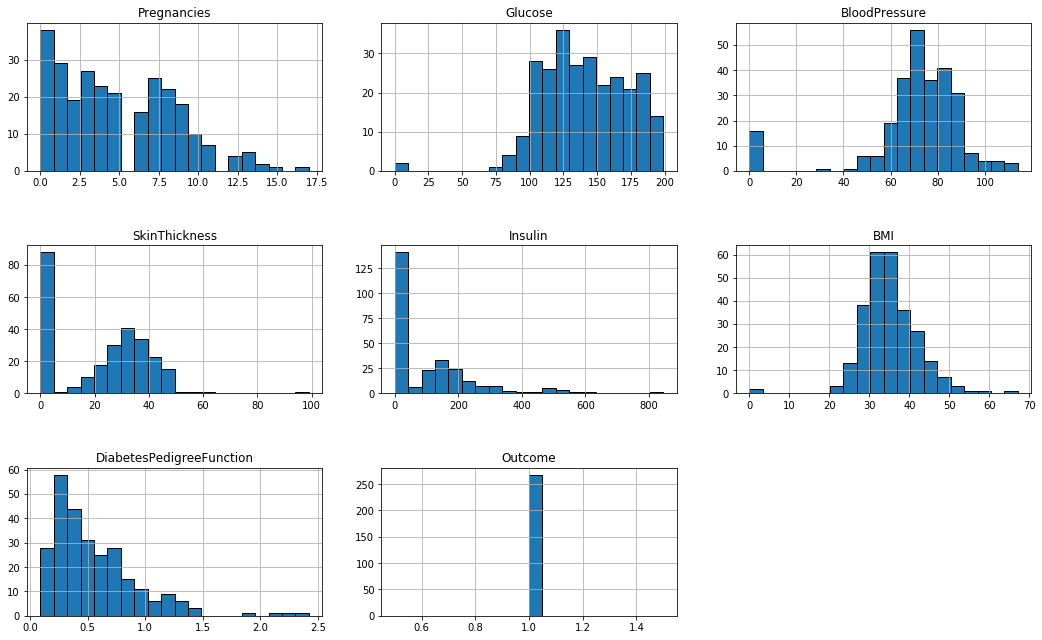

In [61]:
#Analysis of Diabetic Cases
diab1=dataset[dataset['Outcome']==1]
columns=dataset.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [62]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Age_coded
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.221898,0.482390
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.466581,0.184993
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.065068,0.215891
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.074752,-0.098890
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.130548,-0.036274
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.292695,0.052958
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.173844,0.002009
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,1.000000,0.215661
Age_coded,0.482390,0.184993,0.215891,-0.098890,-0.036274,0.052958,0.002009,0.215661,1.000000


In [63]:
#Split Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()

y = dataset.Outcome

X = dataset.drop(["Outcome"], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [64]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age_coded
52,5,88,66,21,23,24.4,0.342,0.0
64,7,114,66,0,0,32.8,0.258,1.0
630,7,114,64,0,0,27.4,0.732,0.0
707,2,127,46,21,335,34.4,0.176,0.0
330,8,118,72,19,0,23.1,1.476,1.0
...,...,...,...,...,...,...,...,...
33,6,92,92,0,0,19.9,0.188,0.0
596,0,67,76,0,0,45.3,0.194,1.0
88,15,136,70,32,110,37.1,0.153,1.0
679,2,101,58,17,265,24.2,0.614,0.0


In [65]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [66]:
num_obs = len(dataset)
num_true = len(dataset.loc[dataset['Outcome'] == 1])
num_false = len(dataset.loc[dataset['Outcome'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


In [67]:
#Test Baseline
# Set model parameters (currently set as default values, but defined here to be explicit)
rf_params = {'n_estimators': 1800, 'min_samples_split': 5, 'bootstrap': False}

# Train Model
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# display performance 
print("\n", "Random Forest Prediction Scores:", "\n", 
      classification_report(y_test, y_pred_rf, target_names=['0', '1']))


 Random Forest Prediction Scores: 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       167
           1       0.66      0.56      0.61        89

    accuracy                           0.75       256
   macro avg       0.72      0.70      0.71       256
weighted avg       0.74      0.75      0.74       256



In [68]:
#Predictive Modeling using Random Forest Classifier
index=10
outcome=dataset['Outcome']
data=dataset[dataset.columns[:8]]
train,test=train_test_split(dataset,test_size=0.25,random_state=0,stratify=dataset['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [69]:
model = RandomForestClassifier(n_estimators=100,random_state=0)
X=dataset[dataset.columns[:8]]
Y=dataset['Outcome']
model.fit(X,Y)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
print('The accuracy of the Random Forest Classifier is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Random Forest Classifier is 1.0


In [70]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age_coded
52,5,88,66,21,23,24.4,0.342,0.0
64,7,114,66,0,0,32.8,0.258,1.0
630,7,114,64,0,0,27.4,0.732,0.0
707,2,127,46,21,335,34.4,0.176,0.0
330,8,118,72,19,0,23.1,1.476,1.0
...,...,...,...,...,...,...,...,...
33,6,92,92,0,0,19.9,0.188,0.0
596,0,67,76,0,0,45.3,0.194,1.0
88,15,136,70,32,110,37.1,0.153,1.0
679,2,101,58,17,265,24.2,0.614,0.0


In [71]:
# Generate comparison table (returned as a pandas dataframe)
meas = fhmc.measure_model(X_test, y_test, X_test['Age_coded'], rf_model)
reports.flag(meas)

In [72]:
# Mitigation Algorithms
from fairlearn.reductions import GridSearch, ExponentiatedGradient

# Fairness Measures
from fairlearn.reductions import EqualizedOdds, DemographicParity 

In [73]:
# Set seed for consistent results with Fairlearn's ExponentiatedGradient
np.random.seed(36)  

In [74]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age_coded
657,1,120,80,48,200,38.9,1.162,1.0
462,8,74,70,40,49,35.3,0.705,0.0
171,6,134,70,23,130,35.4,0.542,0.0
210,2,81,60,22,0,27.7,0.290,0.0
147,2,106,64,35,119,30.5,1.400,0.0
...,...,...,...,...,...,...,...,...
113,4,76,62,0,0,34.0,0.391,0.0
556,1,97,70,40,0,38.1,0.218,0.0
254,12,92,62,7,258,27.6,0.926,1.0
647,0,179,50,36,159,37.8,0.455,0.0


In [75]:
reports.data_report(X_test['Age_coded'], y_test)

,Feature Name,Feature Value,Obs.,Missing Values,Feature Entropy,Target Max,Target Mean,Target Median,Target Min,Target Std. Dev.,Value Prevalence
0,ALL FEATURES,ALL VALUES,256.0,0,NaN,1.0,0.3477,0.0,0.0,0.4772,1.0000
1,Age_coded,0.0,190.0,0,0.8234,1.0,0.2895,0.0,0.0,0.4547,0.7422
2,Age_coded,1.0,66.0,0,0.8234,1.0,0.5152,1.0,0.0,0.5036,0.2578


In [76]:
reports.performance_report(X_test['Age_coded'], y_test, y_pred_rf)

,Feature Name,Feature Value,Obs.,Target Mean,Pred. Mean,Accuracy,FPR,Precision,TPR
0,ALL FEATURES,ALL VALUES,256.0,0.3477,0.2969,0.7461,0.1557,0.6579,0.5618
1,Age_coded,0.0,190.0,0.2895,0.2105,0.7632,0.1111,0.6250,0.4545
2,Age_coded,1.0,66.0,0.5152,0.5455,0.6970,0.3438,0.6944,0.7353


In [77]:
reports.bias_report(X_test['Age_coded'], y_test, y_pred_rf)

,Feature Name,Feature Value,Obs.,FPR Diff,FPR Ratio,PPV Diff,PPV Ratio,TPR Diff,TPR Ratio
0,Age_coded,0.0,190.0,0.2326,3.0938,0.0694,1.1111,0.2807,1.6176
1,Age_coded,1.0,66.0,-0.2326,0.3232,-0.0694,0.9000,-0.2807,0.6182


In [78]:
#Fair ExponentiatedGradient Using Demographic Parity as Constraint
eg_rfDP_model = ExponentiatedGradient(RandomForestClassifier(**rf_params), 
                                      constraints=DemographicParity()) 
eg_rfDP_model.fit(X_train, y_train,
                  sensitive_features=X_train['Age_coded'])
y_pred_eg_rfDP = eg_rfDP_model.predict(X_test)

# display performance 
print("\n", "Prediction Scores:", "\n", 
      classification_report(y_test, y_pred_eg_rfDP, 
       target_names=['Outcome <= mean', 'Outcome > mean']))



 Prediction Scores: 
                  precision    recall  f1-score   support

Outcome <= mean       0.76      0.88      0.81       167
 Outcome > mean       0.68      0.47      0.56        89

       accuracy                           0.74       256
      macro avg       0.72      0.68      0.69       256
   weighted avg       0.73      0.74      0.72       256



In [79]:
#Fair ExponentiatedGradient Using Equalized Odds as Constraint
eg_rfEO_model = ExponentiatedGradient(RandomForestClassifier(**rf_params), 
                                      constraints=EqualizedOdds())  
eg_rfEO_model.fit(X_train, y_train, 
                  sensitive_features=X_train['Age_coded'])
y_pred_eg_rfEO = eg_rfEO_model.predict(X_test)

# display performance 
print("\n", "Prediction Scores:", "\n", 
      classification_report(y_test, y_pred_eg_rfEO, 
       target_names=['Outcome <= mean', 'Outcome > mean']))


 Prediction Scores: 
                  precision    recall  f1-score   support

Outcome <= mean       0.78      0.84      0.81       167
 Outcome > mean       0.65      0.56      0.60        89

       accuracy                           0.74       256
      macro avg       0.72      0.70      0.71       256
   weighted avg       0.74      0.74      0.74       256



In [80]:
#Fair GridSearch Using Equalized Odds as Constraint
# Train GridSearch
gs_rfEO_model = GridSearch(RandomForestClassifier(**rf_params),
                           constraints=EqualizedOdds(),
                           grid_size=45)

gs_rfEO_model.fit(X_train, y_train, 
                  sensitive_features = X_train['Age_coded'])
y_pred_gs_rfEO = gs_rfEO_model.predict(X_test)

# display performance 
print("\n", "Prediction Scores:", "\n", 
      classification_report(y_test, y_pred_gs_rfEO, 
       target_names=['Outcome <= mean', 'Outcome > mean']))



 Prediction Scores: 
                  precision    recall  f1-score   support

Outcome <= mean       0.78      0.84      0.81       167
 Outcome > mean       0.66      0.56      0.61        89

       accuracy                           0.75       256
      macro avg       0.72      0.70      0.71       256
   weighted avg       0.74      0.75      0.74       256



In [81]:
#Fair GridSearch Using Demographic Parity as Constraint
# Train GridSearch
gs_rfDP_model = GridSearch(RandomForestClassifier(**rf_params),
                           constraints=DemographicParity(),
                           grid_size=45)

gs_rfDP_model.fit(X_train, y_train, 
                  sensitive_features=X_train['Age_coded'])
y_pred_gs_rfDP = gs_rfDP_model.predict(X_test)

# display performance 
print("\n", "Prediction Scores:", "\n", 
      classification_report(y_test, y_pred_gs_rfDP, 
       target_names=['Outcome <= mean', 'Outcome > mean']))


 Prediction Scores: 
                  precision    recall  f1-score   support

Outcome <= mean       0.79      0.81      0.80       167
 Outcome > mean       0.63      0.60      0.61        89

       accuracy                           0.74       256
      macro avg       0.71      0.70      0.71       256
   weighted avg       0.74      0.74      0.74       256



In [82]:
#Comparing Several Models
#Setting the Required Variables
X = X_test
y = y_test
protected_attr = X_test['Age_coded']
models = {'rf_model': rf_model,
         'gs_rfEO_model': gs_rfEO_model, 'gs_rfDP_model': gs_rfDP_model,
         'eg_rfEO_model': eg_rfEO_model, 'eg_rfDP_model': eg_rfDP_model}
display("Models being compared in this example:", list(models.keys()))


'Models being compared in this example:'

['rf_model',
 'gs_rfEO_model',
 'gs_rfDP_model',
 'eg_rfEO_model',
 'eg_rfDP_model']

In [83]:
#Comparison with the FairMLHealth Tool
# Generate comparison table (returned as a pandas dataframe)
comparison = fhmc.compare_models(X, y, protected_attr, models)

# Here we determine the indices for equal odds measures so that we can highlight according
#    to those indices later
idx = pd.IndexSlice
eotag = idx[:, ['Equal Opportunity Difference', 'Equalized Odds Difference',
                 'Equalized Odds Ratio']
            ]
equal_odds = comparison.loc[eotag, :].index

# Here we return the flagged table as a pandas styler so we can also highlight 
#       measures of Equal Odds
flagged = reports.flag(comparison, as_styler=True)
flagged.apply(lambda x: ['background-color:' + "#DED8F9" 
                          if x.name in equal_odds else '' for i in x]
                , axis=1)

/opt/anaconda3/lib/python3.7/site-packages/fairmlhealth/model_comparison.py:314: UserWarning: Please note that probabilities could not be generated for the following models: ['eg_rfEO_model', 'eg_rfDP_model']. Dependent metrics will be skipped.
  "Dependent metrics will be skipped.")
